In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
arr_hub = np.loadtxt('Hz_all.dat')

z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'animation' is not defined

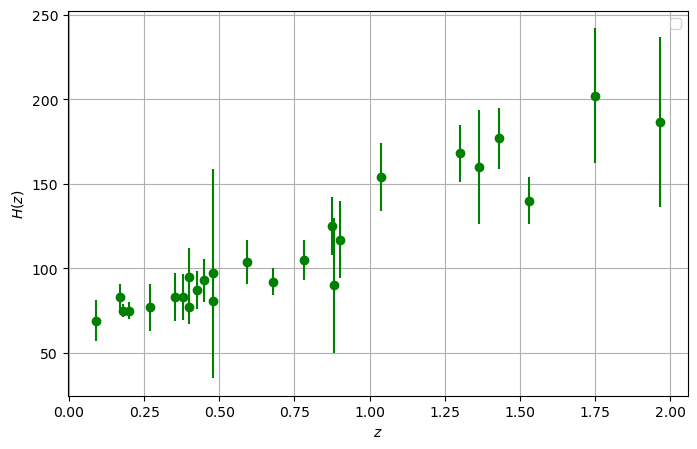

In [4]:
arr_hub = np.loadtxt('Hz_all.dat')

z_obs= arr_hub[:,0]
hub_obs = arr_hub[:,1]
error_obs = arr_hub[:,2]


H0 = 70
Om = 0.3
Or = 1e-4
Ol = 1.0 - Om - Or


def w_CPL(z, w0, wa):
    return w0 + wa * (z / (1 + z))

def Hubble_CPL(z, w0, wa):
    w_z = w_CPL(z, w0, wa)
    exponent = 3 * (1 + w0 + wa) * np.log(1 + z) - 3 * wa * (z / (1 + z))
    return H0 * np.sqrt(Om * (1 + z)**3 + Or * (1 + z)**4 + Ol * np.exp(exponent))


z_vals = np.linspace(0, 3, 100)


w0_vals = np.linspace(-1.5, -0.5, 10)
wa_vals = np.linspace(0.7, -0.7, 10)


w_params = list(zip(w0_vals, wa_vals))


fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], 'b-', lw=2)

ax.errorbar(z_obs, hub_obs, error_obs, ls='', marker='o', color='green')

ax.set_xlabel("$z$")
ax.set_ylabel("$H(z)$")
ax.legend()
ax.grid()

def update(frame):
    w0, wa = w_params[frame % len(w_params)]  
    H_vals = [Hubble_CPL(z, w0, wa) for z in z_vals]
    line.set_data(z_vals, H_vals)
    ax.set_title(f"$w_0={w0:.2f}, w_a={wa:.2f}$")
    return line,


ani = animation.FuncAnimation(fig, update, frames=len(w_params), interval=1000, blit=True)

HTML(ani.to_jshtml())

### Using the ec. 1 in https://iopscience.iop.org/article/10.3847/1538-4365/abf8aa/pdf, 
$$
\mathcal{L} (\theta) = P (H_{obs} | \theta ) = \left( \prod_{i} \frac{1}{\sqrt{2 \pi \sigma_i^2}} \right) \exp{-\frac{\chi^2}{2}},
$$

### where 
$$
\chi^2 = \sum_{i} \frac{\left(H(z_i;\theta)  - H_{obs,i}\right)^2}{\sigma_i^2}
$$

### and $H(z_i;\theta) $ is the theorical Hubble parameter. 

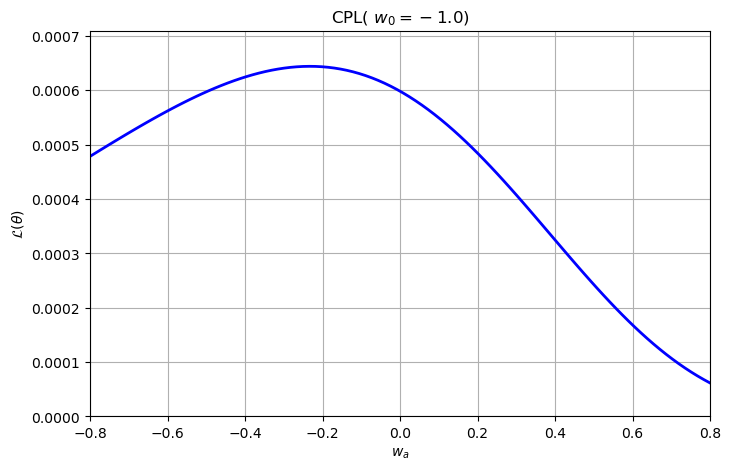

In [ ]:
def chi_squared(w0, wa):
    H_theory = np.array([Hubble_CPL(z, w0, wa) for z in z_obs])
    return np.sum(((hub_obs - H_theory) ** 2) / error_obs ** 2)


def likelihood(w0, wa):
    chi2 = chi_squared(w0, wa)
    return np.exp(-chi2 / 2)


w0 = -1.0 

wa = np.linspace(-0.8, 0.8, 100)

L_wa = np.array([likelihood(w0, wa) for wa in wa])


fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot([], [], 'b-', lw=2)
ax.set_xlim(-0.8, 0.8)
ax.set_ylim(0, 1.1 * max(L_wa))
ax.set_xlabel('$w_a$')
ax.set_ylabel('$\mathcal{L}(\\theta)$')
ax.set_title(f'CPL( $w_0 = {w0}$)')
ax.grid()

def update(frame):
    current_wa = wa_vals[:frame + 1]
    current_L = L_wa[:frame + 1]
    line.set_data(current_wa, current_L)
    return line,

ani = animation.FuncAnimation(fig, update, frames=len(wa_vals), interval=50, blit=True)

HTML(ani.to_jshtml())


Best-fit parameters: w0 = -1.2071, wa = 0.6889


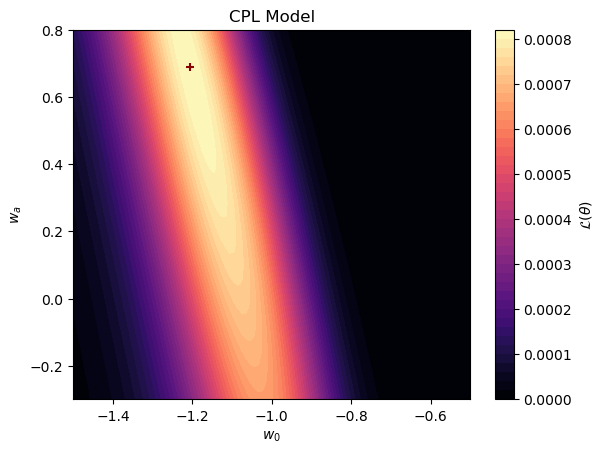

In [93]:
def chi_squared(w0, wa):
    H_theory = [Hubble_CPL(z, w0, wa) for z in z_obs]
    return np.sum(((hub_obs - H_theory)**2 / error_obs**2))

def likelihood(w0, wa):
    chi2 = chi_squared(w0, wa)
    norm= np.prod(1 / np.sqrt(2 * np.pi * error_obs**2))
    return np.exp(-chi2 / 2) # *norm


w0_vals = np.linspace(-1.5, -0.5, 100)  
wa_vals = np.linspace(-0.3, 0.8, 100)  


W0, Wa = np.meshgrid(w0_vals, wa_vals)

# Compute likelihood for each (w0, wa) pair
L = np.zeros_like(W0)
for i in range(len(w0_vals)):
    for j in range(len(wa_vals)):
        L[j, i] = likelihood(W0[j, i], Wa[j, i])

max_index = np.unravel_index(np.argmax(L), L.shape)
w0_best = W0[max_index]
wa_best = Wa[max_index]

print(f"Best-fit parameters: w0 = {w0_best:.4f}, wa = {wa_best:.4f}")

plt.contourf(W0, Wa, L, levels=50, cmap='magma')
plt.colorbar(label='$\mathcal{L}(\\theta)$')
plt.scatter(w0_best, wa_best, color='darkred',marker='+', label=f'Best-fit: $w_0={w0_best:.2f}, w_a={wa_best:.2f}$')
plt.xlabel('$w_0$')
plt.ylabel('$w_a$')
plt.title('CPL Model')
plt.show()